# Extra Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss, matthews_corrcoef
from sklearn.tree import ExtraTreeClassifier  # Import ExtraTreeClassifier instead of DecisionTreeClassifier



In [2]:
#input of train data
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Train.csv")

In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d,Target
0,-2.728889,-25.325082,14.790515,0.805420,3.984015,-6.612719,398.502575,0.125251,-545.754350,-4.559571,...,0.042195,0.579042,159.995844,28.773333,0.119289,12.574040,-6.861521,-499.031111,3.008889,0
1,-0.013172,-9.509606,0.000000,1.188261,10.457433,0.836143,-244.755691,0.056368,286.027058,-4.072640,...,-0.070246,1.164533,153.088486,6.491990,-0.059652,-3.837482,-8.393922,-92.979708,-7.561410,0
2,-8.746667,19.078029,11.050456,0.943259,5.410910,-2.265468,-543.310893,0.095132,-222.679922,-2.797881,...,0.193372,0.767330,155.950676,7.115556,-0.036548,-13.213895,-7.304433,-204.328889,3.671111,0
3,-7.500000,7.298561,0.000000,1.064240,-1.142632,-2.915553,-899.923918,0.142939,-523.700577,-4.546686,...,0.056348,0.951546,155.401583,7.629378,-0.003948,-23.880483,-17.782129,44.177627,-13.250000,0
4,0.979994,-54.298523,0.000000,0.999246,4.309280,-3.544286,-823.626996,0.053800,-493.778160,-4.851646,...,0.056962,0.963492,148.280834,6.573099,0.093608,-14.915751,-7.269271,-34.333333,2.309326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,-2.785000,-2.962981,5.316789,1.053967,6.411154,-1.169308,-370.566598,0.156703,-331.812834,-1.586460,...,0.104734,0.739404,152.740651,7.700000,-0.248710,1.145958,-3.199700,-63.000000,2.282500,1
2164,-2.207908,-18.038352,0.000000,0.815257,9.328611,2.336778,-490.408818,0.084582,295.652771,-2.133108,...,0.079423,0.916667,158.894061,6.959184,0.277052,-7.050913,-9.365004,-8.285714,0.232143,1
2165,1.102273,-28.881507,5.316789,0.908729,6.506799,-2.353837,-1289.670230,0.152006,-997.066785,-2.253884,...,0.115811,0.909485,153.576879,10.671488,0.044511,-17.510129,-17.513844,123.568182,-2.732955,1
2166,-11.248959,-22.799880,10.633577,1.093079,9.120382,-2.371401,-1110.406849,0.195666,-338.916459,-3.060512,...,0.073244,0.668509,157.460655,10.330887,-0.081357,-3.845589,-16.116821,-25.806784,-7.429875,1


In [4]:
y= df.Target
X=df.drop('Target', axis=1)


In [5]:
cat_features=list(range(0,X.shape[1]))
cat_features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [6]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [11]:
x_train = x_train.T
y_train = y_train.T

In [8]:
from sklearn.tree import ExtraTreeClassifier  # Import ExtraTreeClassifier

# Parameters for Extra Tree Classifier
etc = ExtraTreeClassifier(
    #max_depth=14,
    #min_samples_split=8,
    #min_samples_leaf=3,
    #max_features=0.8,  # Equivalent to max_features in ExtraTreeClassifier
    #max_leaf_nodes=None,
    #random_state=42
)

# Fit the Extra Tree Classifier model
etc.fit(x_train.T, y_train.T)

# Calculate accuracy on the training set
acc_train = etc.score(x_train.T, y_train.T) * 100
print(acc_train)

98.75461254612546


C:\Users\DELL\AppData\Local\Temp\ipykernel_20392\3870637213.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_20392\3870637213.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_20392\3870637213.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_20392\3870637213.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_20392\3870637213.py:21: DeprecationWarning: scipy.interp is deprecated and will be remove

<Figure size 4200x3000 with 0 Axes>

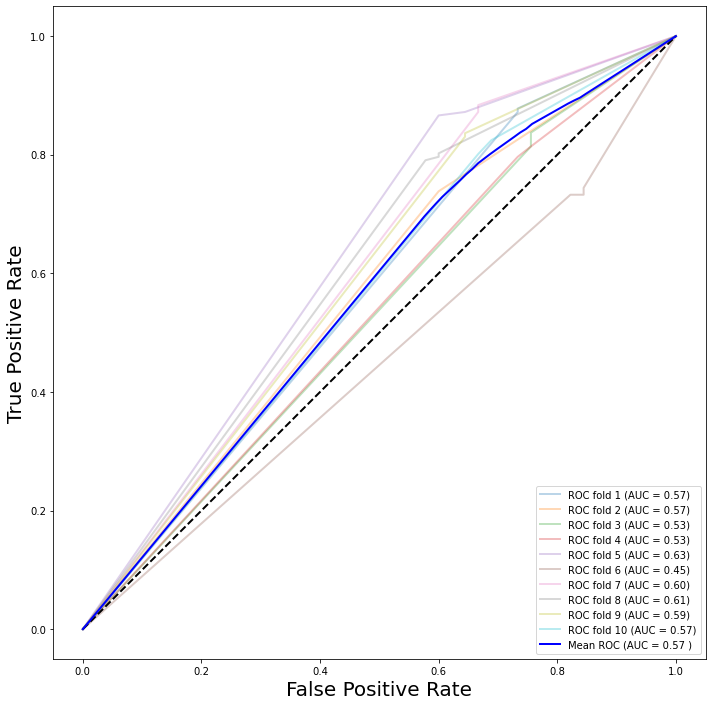

In [9]:
# plot k fold ROC

# 10 fold cross validation of train set
from sklearn.metrics import RocCurveDisplay

from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = etc.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import ExtraTreeClassifier
import numpy as np

# Define the Extra Tree Classifier with your parameters
etc = ExtraTreeClassifier(
   # max_depth=14,
   # min_samples_split=9,
    #min_samples_leaf=6,
    #max_features=0.9,
    #max_leaf_nodes=None,
    #random_state=42
)

# Define the number of folds for K-fold cross-validation
num_folds = 10  # You can adjust the number of folds as needed

# Define K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(etc, x_train.T, y_train.T, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation
print("Mean accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard deviation: {:.2f}".format(np.std(cv_scores)))


Cross-validation scores: [0.75115207 0.65898618 0.75115207 0.71428571 0.71889401 0.69585253
 0.70506912 0.75115207 0.76851852 0.71759259]
Mean accuracy: 72.33%
Standard deviation: 0.03


# Test Set

In [2]:
#Read the validation Test set
v_test_data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(480, 61)

In [14]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [15]:
from sklearn.tree import ExtraTreeClassifier  # Import ExtraTreeClassifier

# Parameters for Extra Tree Classifier
etc = ExtraTreeClassifier(
   # max_depth=14,
   # min_samples_split=8,
   # min_samples_leaf=3,
   # max_features=0.8,  # Equivalent to max_features in ExtraTreeClassifier
   # max_leaf_nodes=None,
   # random_state=42
)

# Fit the Extra Tree Classifier model
etc.fit(x_train.T, y_train.T)
v_predictions = etc.predict(X_v_test_data)
acc_train=etc.score(x_train.T,y_train.T)*100
v_acc_test = etc.score(X_v_test_data, Y_v_test_data)*100
print(acc_train)
print(v_acc_test)

98.75461254612546
72.91666666666666


In [16]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)


Accuracy:72.917
Sensitivity:0.780
Specificity:0.475
Balance accuracy:0.627
MCC: 0.216
AUC: 0.627
Brier_loss: 0.271
False Postive rate: 0.525
False Negative rate: 0.220
Precision: 0.881
Recall: 0.780
F1: 0.828
Kappa: 0.207


In [17]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.30      0.47      0.37        80
           1       0.88      0.78      0.83       400

    accuracy                           0.73       480
   macro avg       0.59      0.63      0.60       480
weighted avg       0.78      0.73      0.75       480



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

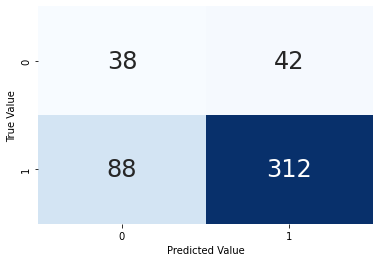

In [18]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [19]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]
etc_prob = etc.predict_proba(X_v_test_data)
etc_prob = etc_prob[:,1]

In [20]:
r_auc_score = roc_auc_score(Y_v_test_data, etc_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, etc_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.6273125


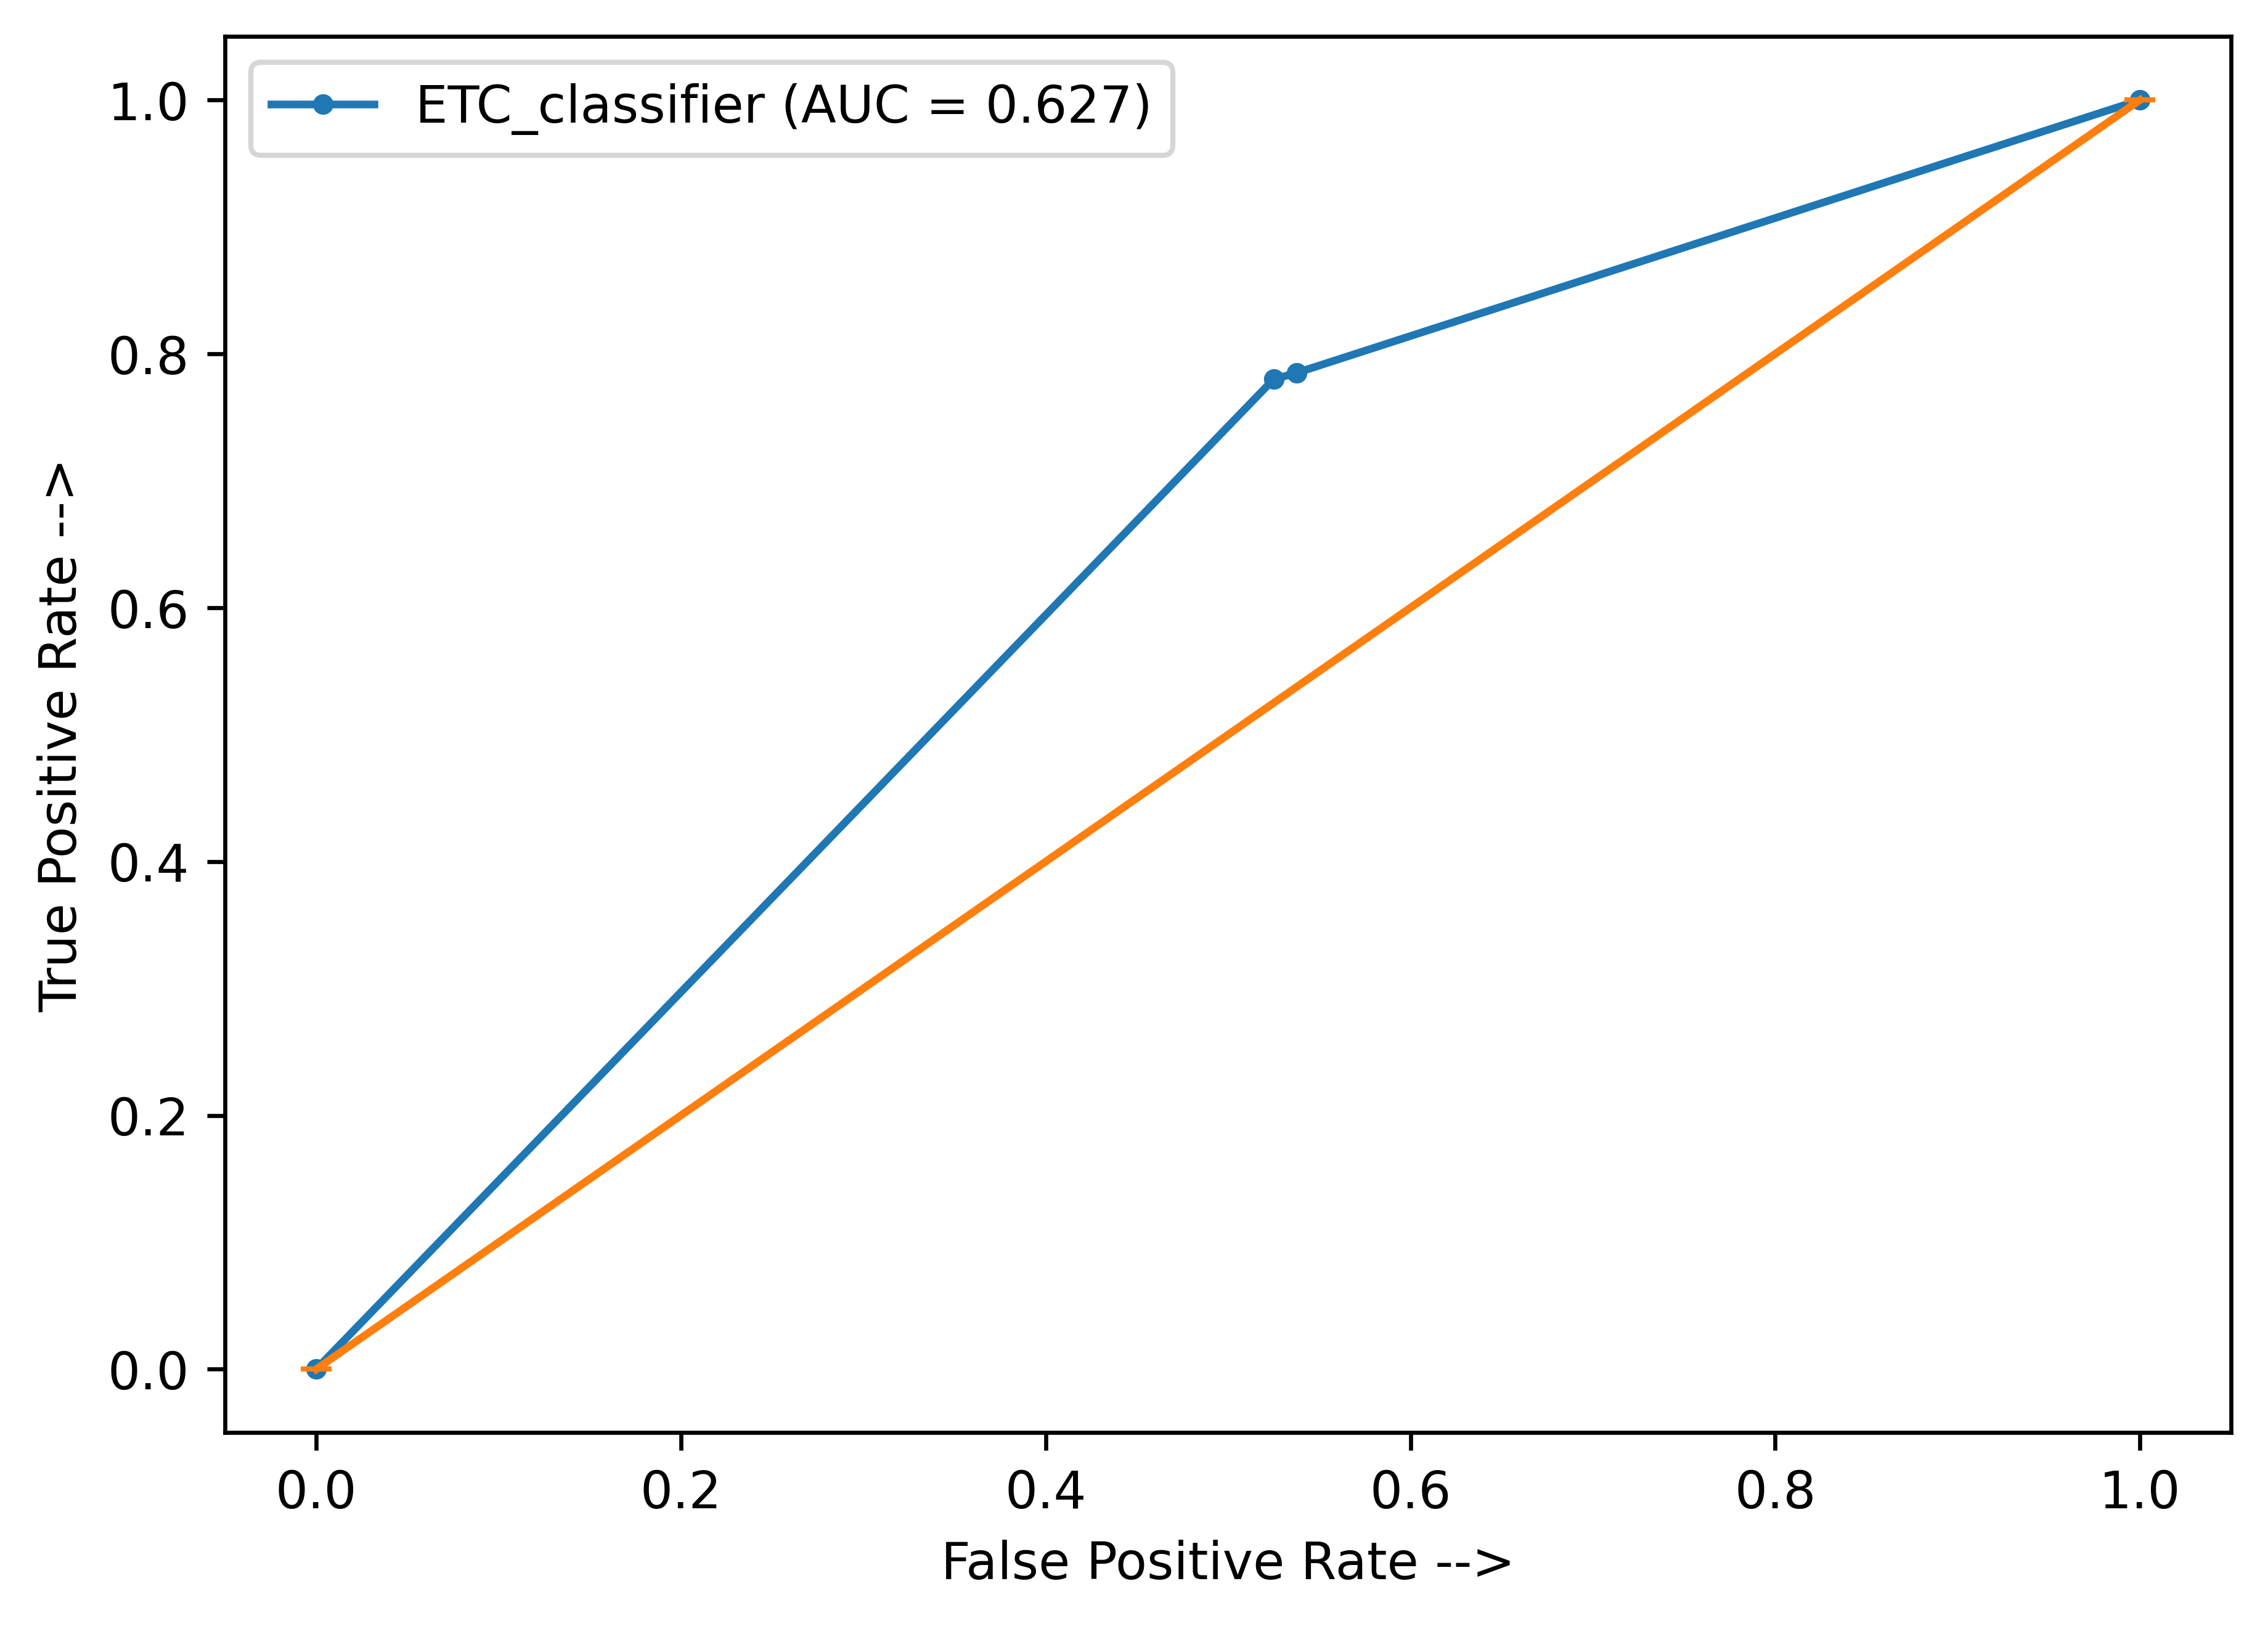

In [22]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='ETC_classifier (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('XGB_AUC.png', dpi=600, bbox_inches='tight') to save the image

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/480 [00:00<?, ?it/s]

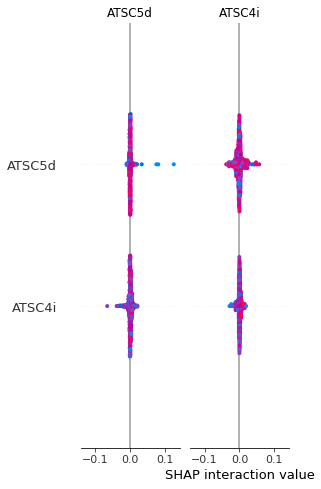

In [4]:
import shap
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Assuming v_test_data is your dataset
Y_v_test_data = v_test_data['Target']
X_v_test_data = v_test_data.drop('Target', axis=1)

# Train Extra Trees model
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_v_test_data, Y_v_test_data)

# Define the number of background samples
num_background_samples = 200

# Sample background data
background_summary = shap.sample(X_v_test_data, num_background_samples)

# Create a SHAP explainer
explainer = shap.KernelExplainer(extra_trees_model.predict_proba, background_summary)

# Calculate SHAP values
shap_values = explainer.shap_values(X_v_test_data)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data, plot_type="bar")
